In [1]:
import pandas as pd

import numpy as np

df = pd.read_csv('weatherAUS.csv')

df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
#voy a hacer una prueba de concepto

df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [4]:
(56420/145460)*100#sacando todos los nan, queda el 38.78% de los datos

38.78729547641964

In [5]:
df.shape

(145460, 23)

In [6]:
df_nonull = df.dropna()#voy a trabaajr con ambos df, a ver que tal sale todo

In [7]:
#entonces trabajo con ambos df, para ver si hay grandes diferencias

In [8]:
#primero seria util pasar las fechas a formato datetime, y obtener el mes como valor

#prueba de concepto

df['Date'].isna().any()

False

In [9]:
df.dropna(subset=['RainToday' , 'RainTomorrow']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [10]:
pd.to_datetime(df['Date'][0]).month

12

In [11]:
#ahora puedo crear una funcion que haga esto

In [12]:
def mesNumerico(dataframe , strcol):
    
    lista_meses = []
    
    for fila in range(0 , dataframe.shape[0]):
        
        lista_meses.append(pd.to_datetime(df['Date'][fila]).month)
    
    
    dataframe['mes'] = lista_meses
    
    return(dataframe)

mesNumerico(df_nonull , 'Date')

df_nonull['mes']

/tmp/ipykernel_56358/2094322140.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['mes'] = lista_meses


6049      12
6050      12
6052      12
6053      12
6054      12
          ..
142298     8
142299     8
142300     8
142301     8
142302     8
Name: mes, Length: 56420, dtype: int64

In [13]:
df_nonull

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,mes
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,12
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,12
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,12
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,12
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,8
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,8
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,8
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,8


In [14]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [15]:
#mesNumerico(df , 'Date')

#df['mes']

In [16]:
#df.info()

In [17]:
#anio como otra variable

def anioNumerico(dataframe , strcol):
    
    lista_anios = []
    
    for fila in range(0 , dataframe.shape[0]):
        
        lista_anios.append(pd.to_datetime(df['Date'][fila]).year)
    
    
    dataframe['anio'] = lista_anios
    
    return(dataframe)

anioNumerico(df_nonull , 'Date')

anioNumerico(df , 'Date')

print(len(df_nonull['anio']) , len(df['anio']))

/tmp/ipykernel_56358/1905260504.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['anio'] = lista_anios


56420 145460


In [18]:
#otra cosa util, es pasar las localidades a formato numerico

#vamos a explorarlo

df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [19]:
lista_localidades = list(df['Location'].unique())

In [20]:
lista_loc_num = list(np.arange(0,len(lista_localidades)))

print(len(lista_loc_num) , len(lista_localidades))

49 49


In [21]:
dic_localidades = dict(zip(lista_localidades , lista_loc_num))

dic_localidades.keys()

dict_keys(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru'])

In [22]:
dic_localidades

{'Albury': 0,
 'BadgerysCreek': 1,
 'Cobar': 2,
 'CoffsHarbour': 3,
 'Moree': 4,
 'Newcastle': 5,
 'NorahHead': 6,
 'NorfolkIsland': 7,
 'Penrith': 8,
 'Richmond': 9,
 'Sydney': 10,
 'SydneyAirport': 11,
 'WaggaWagga': 12,
 'Williamtown': 13,
 'Wollongong': 14,
 'Canberra': 15,
 'Tuggeranong': 16,
 'MountGinini': 17,
 'Ballarat': 18,
 'Bendigo': 19,
 'Sale': 20,
 'MelbourneAirport': 21,
 'Melbourne': 22,
 'Mildura': 23,
 'Nhil': 24,
 'Portland': 25,
 'Watsonia': 26,
 'Dartmoor': 27,
 'Brisbane': 28,
 'Cairns': 29,
 'GoldCoast': 30,
 'Townsville': 31,
 'Adelaide': 32,
 'MountGambier': 33,
 'Nuriootpa': 34,
 'Woomera': 35,
 'Albany': 36,
 'Witchcliffe': 37,
 'PearceRAAF': 38,
 'PerthAirport': 39,
 'Perth': 40,
 'SalmonGums': 41,
 'Walpole': 42,
 'Hobart': 43,
 'Launceston': 44,
 'AliceSprings': 45,
 'Darwin': 46,
 'Katherine': 47,
 'Uluru': 48}

In [23]:
#entonces ahroa puedo mapear y modificar el dataset, para que la lcoalidad sea numerica

#lo pruebo

def localidad_num(dataframe , strcol):
    
    dataframe['loc_num'] = dataframe[strcol].map(dic_localidades)
    
    return(dataframe)

localidad_num(df_nonull , 'Location')

df_nonull['loc_num']

/tmp/ipykernel_56358/4130167193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['loc_num'] = dataframe[strcol].map(dic_localidades)


6049       2
6050       2
6052       2
6053       2
6054       2
          ..
142298    46
142299    46
142300    46
142301    46
142302    46
Name: loc_num, Length: 56420, dtype: int64

In [24]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [25]:
#localidad_num(df , 'Location')

#df['loc_num'].info()

In [26]:
#creo que ya estan todas las columnas transformadas a formatos utiles

#queda seleccionar las columnas a utilizar para el arbol de desicion

#df.columns

In [27]:
#falta convertir a numerico los datos de raintoday , y de raintomorrow, y evaluar si las columnas del tipo

#object son o no relevantes-informativas

#para ello vamos a ver como estan codificados

#df['RainToday'].unique()

In [28]:
#df['RainTomorrow'].unique()

In [29]:
#df = df.dropna(subset=['RainToday' , 'RainTomorrow'])
#elimino los nan de las filas donde en esas columnas hay nan

In [30]:
#df.info()

In [31]:
#df["RainToday"].unique()

In [32]:
#df['RainTomorrow'].unique()

In [33]:
#ahora ya puedo convertir estas variables a yes = 1 , no = 0

def codeNoYes(dataframe , strcol_original , strcol_nueva):
    
    dicc = {'Yes':1 , 'No': 0}
    
    dataframe[strcol_nueva] = dataframe[strcol_original].map(dicc)
    
    return(dataframe)

#codeNoYes(df , "RainToday" , "llovio_hoy")

#codeNoYes(df , "RainTomorrow" , "llueve_man")

codeNoYes(df_nonull , "RainToday" , "llovio_hoy")

codeNoYes(df_nonull , "RainTomorrow" , "llueve_man")

print(df_nonull["llovio_hoy"].unique() ,  
      df_nonull["llueve_man"].unique())

[0 1] [0 1]


/tmp/ipykernel_56358/434707965.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[strcol_nueva] = dataframe[strcol_original].map(dicc)
/tmp/ipykernel_56358/434707965.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[strcol_nueva] = dataframe[strcol_original].map(dicc)


In [34]:
#a chequear el resto de las variables del tipo object

df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [35]:
#las variables a chequear son: WindGustDir , WindDir9am , WindDir3pm

print(list(df_nonull['WindGustDir'].unique()) , list(df_nonull['WindDir9am'].unique()) , list(df_nonull['WindDir3pm'].unique()))

['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W', 'WSW', 'NNW', 'ESE', 'SSE', 'NW'] ['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW', 'E', 'NNW', 'ESE', 'WSW', 'SW'] ['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE', 'NW', 'E', 'ESE', 'NE', 'SSW', 'W']


In [36]:
vientos = set(list(df_nonull['WindGustDir'].unique()) + list(df_nonull['WindDir9am'].unique()) + list(df_nonull['WindDir3pm'].unique()))

In [37]:
len(vientos)

16

In [38]:
vientos

{'E',
 'ENE',
 'ESE',
 'N',
 'NE',
 'NNE',
 'NNW',
 'NW',
 'S',
 'SE',
 'SSE',
 'SSW',
 'SW',
 'W',
 'WNW',
 'WSW'}

In [39]:
vientos = list(vientos)

vientos

['E',
 'WNW',
 'SSW',
 'NNE',
 'SW',
 'NE',
 'WSW',
 'ESE',
 'NW',
 'NNW',
 'ENE',
 'SSE',
 'S',
 'N',
 'W',
 'SE']

In [40]:
vientos[0]

'E'

In [41]:
#voy a armar un vector de 16 dim para cada posible tipo de viento
#codificando como 0 si no aparece, 1 si aparece
#ej NNE sera 0 para el resto, 1 E

#['N','ESE','NE','W','SSW','NNW','ENE','NW','E','SE','NNE','WSW','SSE','SW','WNW','S']

#lista_vectores = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                 [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                 [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
#                 [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
#                 [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
#                 [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
#                 [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
#                 [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
#                 [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
#                 [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
#                 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
#                 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
#                 [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
#                 [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
#                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
#                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]

#dict_vientos = dict(zip(vientos , lista_vectores))

#df_nonull['vientos_rafaga'] = df_nonull['WindGustDir'].map(dict_vientos)

#df_nonull['vientos_9am'] = df_nonull['WindDir9am'].map(dict_vientos)

#df_nonull['vientos_3pm'] = df_nonull['WindDir3pm'].map(dict_vientos)

#df['vientos_rafaga'] = df['WindGustDir'].map(dict_vientos)

#df['vientos_9am'] = df['WindDir9am'].map(dict_vientos)

#df['vientos_3pm'] = df['WindDir3pm'].map(dict_vientos)

In [43]:
for wind_col in {"WindDir3pm", "WindDir9am", "WindGustDir"}:
    for direction, rows in df_nonull.groupby(wind_col):
        df_nonull[f"{wind_col}_one_key_{direction}"] = df_nonull[wind_col] == direction

/tmp/ipykernel_56358/3117492525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull[f"{wind_col}_one_key_{direction}"] = df_nonull[wind_col] == direction
/tmp/ipykernel_56358/3117492525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull[f"{wind_col}_one_key_{direction}"] = df_nonull[wind_col] == direction
/tmp/ipykernel_56358/3117492525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

/tmp/ipykernel_56358/3117492525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull[f"{wind_col}_one_key_{direction}"] = df_nonull[wind_col] == direction
/tmp/ipykernel_56358/3117492525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull[f"{wind_col}_one_key_{direction}"] = df_nonull[wind_col] == direction
/tmp/ipykernel_56358/3117492525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [45]:
df_nonull.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir9am_one_key_NNW,WindDir9am_one_key_NW,WindDir9am_one_key_S,WindDir9am_one_key_SE,WindDir9am_one_key_SSE,WindDir9am_one_key_SSW,WindDir9am_one_key_SW,WindDir9am_one_key_W,WindDir9am_one_key_WNW,WindDir9am_one_key_WSW
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,False,False,False,False,False,False,False,False,False,False
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,False,False,False,False,True,False,False,False,False,False
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,False,False,False,False,False,False,False,False,False,False
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,False,False,False,False,False,False,False,False,True,False
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,False,True,False,False,False,False,False,False,False,False
6055,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,False,False,False,False,False,False,False,False,False,False
6056,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,False,False,True,False,False,False,False,False,False,False
6057,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,False,False,False,True,False,False,False,False,False,False
6058,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,False,False,False,False,False,False,False,False,False,False
6059,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,False,False,False,False,False,False,False,False,False,False


In [60]:
#df_nonull['vientos_rafaga']

6049      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
6050      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
6052      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
6053      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6054      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                                ...                       
142298    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
142299    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
142300    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
142301    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
142302    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Name: vientos_rafaga, Length: 56420, dtype: object

In [46]:
df_nonull.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'mes', 'anio', 'loc_num',
       'llovio_hoy', 'llueve_man', 'WindGustDir_one_key_E',
       'WindGustDir_one_key_ENE', 'WindGustDir_one_key_ESE',
       'WindGustDir_one_key_N', 'WindGustDir_one_key_NE',
       'WindGustDir_one_key_NNE', 'WindGustDir_one_key_NNW',
       'WindGustDir_one_key_NW', 'WindGustDir_one_key_S',
       'WindGustDir_one_key_SE', 'WindGustDir_one_key_SSE',
       'WindGustDir_one_key_SSW', 'WindGustDir_one_key_SW',
       'WindGustDir_one_key_W', 'WindGustDir_one_key_WNW',
       'WindGustDir_one_key_WSW', 'WindDir3pm_one_key_E',
       'WindDir3pm_one_key_ENE', 'WindDir3pm_one_key_ESE',
       'WindDir3pm_one_key_N', 'WindD

In [48]:
#completo = df.loc[: , ['anio' , 'mes' , 'loc_num' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
#'Sunshine', 'vientos_rafaga', 'WindGustSpeed', 'vientos_9am', 'vientos_3pm','WindSpeed9am', 'WindSpeed3pm',
#'Humidity9am','Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
#'Temp3pm', 'llovio_hoy', 'llueve_man']]

nonull = df_nonull.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'mes', 'anio', 'loc_num',
       'llovio_hoy', 'llueve_man', 'WindGustDir_one_key_E',
       'WindGustDir_one_key_ENE', 'WindGustDir_one_key_ESE',
       'WindGustDir_one_key_N', 'WindGustDir_one_key_NE',
       'WindGustDir_one_key_NNE', 'WindGustDir_one_key_NNW',
       'WindGustDir_one_key_NW', 'WindGustDir_one_key_S',
       'WindGustDir_one_key_SE', 'WindGustDir_one_key_SSE',
       'WindGustDir_one_key_SSW', 'WindGustDir_one_key_SW',
       'WindGustDir_one_key_W', 'WindGustDir_one_key_WNW',
       'WindGustDir_one_key_WSW', 'WindDir3pm_one_key_E',
       'WindDir3pm_one_key_ENE', 'WindDir3pm_one_key_ESE',
       'WindDir3pm_one_key_N', 'WindDir3pm_one_key_NE',
       'WindDir3pm_one_key_NNE', 'WindDir3pm_one_key_NNW',
       'WindDir3pm_one_key_NW', 'WindDir3pm_one_key_S',
       'WindDir3pm_one_key_SE', 'WindDir3pm_one_key_SSE',
       'WindDir3pm_one_key_SSW', 'WindDir3pm_one_key_SW',
       'WindDir3pm_one_key_W', 'WindDir3pm_one_key_WNW',
       'WindDir3pm_one_key_WSW', 'WindDir9am_one_key_E',
       'WindDir9am_one_key_ENE', 'WindDir9am_one_key_ESE',
       'WindDir9am_one_key_N', 'WindDir9am_one_key_NE',
       'WindDir9am_one_key_NNE', 'WindDir9am_one_key_NNW',
       'WindDir9am_one_key_NW', 'WindDir9am_one_key_S',
       'WindDir9am_one_key_SE', 'WindDir9am_one_key_SSE',
       'WindDir9am_one_key_SSW', 'WindDir9am_one_key_SW',
       'WindDir9am_one_key_W', 'WindDir9am_one_key_WNW',
       'WindDir9am_one_key_WSW']]

In [49]:
nonull.shape

(56420, 74)

In [50]:
nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MinTemp                  56420 non-null  float64
 1   MaxTemp                  56420 non-null  float64
 2   Rainfall                 56420 non-null  float64
 3   Evaporation              56420 non-null  float64
 4   Sunshine                 56420 non-null  float64
 5   WindGustDir              56420 non-null  object 
 6   WindGustSpeed            56420 non-null  float64
 7   WindDir9am               56420 non-null  object 
 8   WindDir3pm               56420 non-null  object 
 9   WindSpeed9am             56420 non-null  float64
 10  WindSpeed3pm             56420 non-null  float64
 11  Humidity9am              56420 non-null  float64
 12  Humidity3pm              56420 non-null  float64
 13  Pressure9am              56420 non-null  float64
 14  Pressure3pm       

In [53]:
nonull[['WindGustDir_one_key_E',
       'WindGustDir_one_key_ENE', 'WindGustDir_one_key_ESE',
       'WindGustDir_one_key_N', 'WindGustDir_one_key_NE',
       'WindGustDir_one_key_NNE', 'WindGustDir_one_key_NNW',
       'WindGustDir_one_key_NW', 'WindGustDir_one_key_S',
       'WindGustDir_one_key_SE', 'WindGustDir_one_key_SSE',
       'WindGustDir_one_key_SSW', 'WindGustDir_one_key_SW',
       'WindGustDir_one_key_W', 'WindGustDir_one_key_WNW',
       'WindGustDir_one_key_WSW', 'WindDir3pm_one_key_E',
       'WindDir3pm_one_key_ENE', 'WindDir3pm_one_key_ESE',
       'WindDir3pm_one_key_N', 'WindDir3pm_one_key_NE',
       'WindDir3pm_one_key_NNE', 'WindDir3pm_one_key_NNW',
       'WindDir3pm_one_key_NW', 'WindDir3pm_one_key_S',
       'WindDir3pm_one_key_SE', 'WindDir3pm_one_key_SSE',
       'WindDir3pm_one_key_SSW', 'WindDir3pm_one_key_SW',
       'WindDir3pm_one_key_W', 'WindDir3pm_one_key_WNW',
       'WindDir3pm_one_key_WSW', 'WindDir9am_one_key_E',
       'WindDir9am_one_key_ENE', 'WindDir9am_one_key_ESE',
       'WindDir9am_one_key_N', 'WindDir9am_one_key_NE',
       'WindDir9am_one_key_NNE', 'WindDir9am_one_key_NNW',
       'WindDir9am_one_key_NW', 'WindDir9am_one_key_S',
       'WindDir9am_one_key_SE', 'WindDir9am_one_key_SSE',
       'WindDir9am_one_key_SSW', 'WindDir9am_one_key_SW',
       'WindDir9am_one_key_W', 'WindDir9am_one_key_WNW',
       'WindDir9am_one_key_WSW']] = nonull[['WindGustDir_one_key_E',
       'WindGustDir_one_key_ENE', 'WindGustDir_one_key_ESE',
       'WindGustDir_one_key_N', 'WindGustDir_one_key_NE',
       'WindGustDir_one_key_NNE', 'WindGustDir_one_key_NNW',
       'WindGustDir_one_key_NW', 'WindGustDir_one_key_S',
       'WindGustDir_one_key_SE', 'WindGustDir_one_key_SSE',
       'WindGustDir_one_key_SSW', 'WindGustDir_one_key_SW',
       'WindGustDir_one_key_W', 'WindGustDir_one_key_WNW',
       'WindGustDir_one_key_WSW', 'WindDir3pm_one_key_E',
       'WindDir3pm_one_key_ENE', 'WindDir3pm_one_key_ESE',
       'WindDir3pm_one_key_N', 'WindDir3pm_one_key_NE',
       'WindDir3pm_one_key_NNE', 'WindDir3pm_one_key_NNW',
       'WindDir3pm_one_key_NW', 'WindDir3pm_one_key_S',
       'WindDir3pm_one_key_SE', 'WindDir3pm_one_key_SSE',
       'WindDir3pm_one_key_SSW', 'WindDir3pm_one_key_SW',
       'WindDir3pm_one_key_W', 'WindDir3pm_one_key_WNW',
       'WindDir3pm_one_key_WSW', 'WindDir9am_one_key_E',
       'WindDir9am_one_key_ENE', 'WindDir9am_one_key_ESE',
       'WindDir9am_one_key_N', 'WindDir9am_one_key_NE',
       'WindDir9am_one_key_NNE', 'WindDir9am_one_key_NNW',
       'WindDir9am_one_key_NW', 'WindDir9am_one_key_S',
       'WindDir9am_one_key_SE', 'WindDir9am_one_key_SSE',
       'WindDir9am_one_key_SSW', 'WindDir9am_one_key_SW',
       'WindDir9am_one_key_W', 'WindDir9am_one_key_WNW',
       'WindDir9am_one_key_WSW']].applymap(np.int64)

In [54]:
nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MinTemp                  56420 non-null  float64
 1   MaxTemp                  56420 non-null  float64
 2   Rainfall                 56420 non-null  float64
 3   Evaporation              56420 non-null  float64
 4   Sunshine                 56420 non-null  float64
 5   WindGustDir              56420 non-null  object 
 6   WindGustSpeed            56420 non-null  float64
 7   WindDir9am               56420 non-null  object 
 8   WindDir3pm               56420 non-null  object 
 9   WindSpeed9am             56420 non-null  float64
 10  WindSpeed3pm             56420 non-null  float64
 11  Humidity9am              56420 non-null  float64
 12  Humidity3pm              56420 non-null  float64
 13  Pressure9am              56420 non-null  float64
 14  Pressure3pm       

In [55]:
nonull.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'mes', 'anio', 'loc_num',
       'llovio_hoy', 'llueve_man', 'WindGustDir_one_key_E',
       'WindGustDir_one_key_ENE', 'WindGustDir_one_key_ESE',
       'WindGustDir_one_key_N', 'WindGustDir_one_key_NE',
       'WindGustDir_one_key_NNE', 'WindGustDir_one_key_NNW',
       'WindGustDir_one_key_NW', 'WindGustDir_one_key_S',
       'WindGustDir_one_key_SE', 'WindGustDir_one_key_SSE',
       'WindGustDir_one_key_SSW', 'WindGustDir_one_key_SW',
       'WindGustDir_one_key_W', 'WindGustDir_one_key_WNW',
       'WindGustDir_one_key_WSW', 'WindDir3pm_one_key_E',
       'WindDir3pm_one_key_ENE', 'WindDir3pm_one_key_ESE',
       'WindDir3pm_one_key_N', 'WindDir3pm_one_key_NE',
 

In [56]:
nonull = nonull.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm',  'mes', 'anio', 'loc_num',
       'llovio_hoy', 'llueve_man', 'WindGustDir_one_key_E',
       'WindGustDir_one_key_ENE', 'WindGustDir_one_key_ESE',
       'WindGustDir_one_key_N', 'WindGustDir_one_key_NE',
       'WindGustDir_one_key_NNE', 'WindGustDir_one_key_NNW',
       'WindGustDir_one_key_NW', 'WindGustDir_one_key_S',
       'WindGustDir_one_key_SE', 'WindGustDir_one_key_SSE',
       'WindGustDir_one_key_SSW', 'WindGustDir_one_key_SW',
       'WindGustDir_one_key_W', 'WindGustDir_one_key_WNW',
       'WindGustDir_one_key_WSW', 'WindDir3pm_one_key_E',
       'WindDir3pm_one_key_ENE', 'WindDir3pm_one_key_ESE',
       'WindDir3pm_one_key_N', 'WindDir3pm_one_key_NE',
       'WindDir3pm_one_key_NNE', 'WindDir3pm_one_key_NNW',
       'WindDir3pm_one_key_NW', 'WindDir3pm_one_key_S',
       'WindDir3pm_one_key_SE', 'WindDir3pm_one_key_SSE',
       'WindDir3pm_one_key_SSW', 'WindDir3pm_one_key_SW',
       'WindDir3pm_one_key_W', 'WindDir3pm_one_key_WNW',
       'WindDir3pm_one_key_WSW', 'WindDir9am_one_key_E',
       'WindDir9am_one_key_ENE', 'WindDir9am_one_key_ESE',
       'WindDir9am_one_key_N', 'WindDir9am_one_key_NE',
       'WindDir9am_one_key_NNE', 'WindDir9am_one_key_NNW',
       'WindDir9am_one_key_NW', 'WindDir9am_one_key_S',
       'WindDir9am_one_key_SE', 'WindDir9am_one_key_SSE',
       'WindDir9am_one_key_SSW', 'WindDir9am_one_key_SW',
       'WindDir9am_one_key_W', 'WindDir9am_one_key_WNW',
       'WindDir9am_one_key_WSW']]

In [57]:
nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MinTemp                  56420 non-null  float64
 1   MaxTemp                  56420 non-null  float64
 2   Rainfall                 56420 non-null  float64
 3   Evaporation              56420 non-null  float64
 4   Sunshine                 56420 non-null  float64
 5   WindGustSpeed            56420 non-null  float64
 6   WindSpeed9am             56420 non-null  float64
 7   WindSpeed3pm             56420 non-null  float64
 8   Humidity9am              56420 non-null  float64
 9   Humidity3pm              56420 non-null  float64
 10  Pressure9am              56420 non-null  float64
 11  Pressure3pm              56420 non-null  float64
 12  Cloud9am                 56420 non-null  float64
 13  Cloud3pm                 56420 non-null  float64
 14  Temp9am           

In [59]:
#ahora voy a armar los trainig y testng sets, de cada dataset...

from sklearn.model_selection import train_test_split

#completo_train, completo_test, y_completo_train, y_completo_test = train_test_split(
#    completo.loc[: , ['anio' , 'mes' , 'loc_num' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
#'Sunshine', 'vientos_rafaga', 'WindGustSpeed', 'vientos_9am', 'vientos_3pm','WindSpeed9am', 'WindSpeed3pm',
#'Humidity9am','Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
#'Temp3pm', 'llovio_hoy']] , completo.loc[: , ['llueve_man']] , test_size=0.2, random_state=512)

nonull_train, nonull_test, y_nonull_train, y_nonull_test = train_test_split(
    nonull.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm',  'mes', 'anio', 'loc_num',
       'llovio_hoy', 'WindGustDir_one_key_E',
       'WindGustDir_one_key_ENE', 'WindGustDir_one_key_ESE',
       'WindGustDir_one_key_N', 'WindGustDir_one_key_NE',
       'WindGustDir_one_key_NNE', 'WindGustDir_one_key_NNW',
       'WindGustDir_one_key_NW', 'WindGustDir_one_key_S',
       'WindGustDir_one_key_SE', 'WindGustDir_one_key_SSE',
       'WindGustDir_one_key_SSW', 'WindGustDir_one_key_SW',
       'WindGustDir_one_key_W', 'WindGustDir_one_key_WNW',
       'WindGustDir_one_key_WSW', 'WindDir3pm_one_key_E',
       'WindDir3pm_one_key_ENE', 'WindDir3pm_one_key_ESE',
       'WindDir3pm_one_key_N', 'WindDir3pm_one_key_NE',
       'WindDir3pm_one_key_NNE', 'WindDir3pm_one_key_NNW',
       'WindDir3pm_one_key_NW', 'WindDir3pm_one_key_S',
       'WindDir3pm_one_key_SE', 'WindDir3pm_one_key_SSE',
       'WindDir3pm_one_key_SSW', 'WindDir3pm_one_key_SW',
       'WindDir3pm_one_key_W', 'WindDir3pm_one_key_WNW',
       'WindDir3pm_one_key_WSW', 'WindDir9am_one_key_E',
       'WindDir9am_one_key_ENE', 'WindDir9am_one_key_ESE',
       'WindDir9am_one_key_N', 'WindDir9am_one_key_NE',
       'WindDir9am_one_key_NNE', 'WindDir9am_one_key_NNW',
       'WindDir9am_one_key_NW', 'WindDir9am_one_key_S',
       'WindDir9am_one_key_SE', 'WindDir9am_one_key_SSE',
       'WindDir9am_one_key_SSW', 'WindDir9am_one_key_SW',
       'WindDir9am_one_key_W', 'WindDir9am_one_key_WNW',
       'WindDir9am_one_key_WSW']] , nonull.loc[: , ['llueve_man']] , test_size=0.2, random_state=512)

print(nonull.shape ,nonull_train.shape, nonull_test.shape, y_nonull_train.shape, y_nonull_test.shape)

(56420, 69) (45136, 68) (11284, 68) (45136, 1) (11284, 1)


In [60]:
nonull.isna().any()

MinTemp                   False
MaxTemp                   False
Rainfall                  False
Evaporation               False
Sunshine                  False
                          ...  
WindDir9am_one_key_SSW    False
WindDir9am_one_key_SW     False
WindDir9am_one_key_W      False
WindDir9am_one_key_WNW    False
WindDir9am_one_key_WSW    False
Length: 69, dtype: bool

In [64]:
#voy a probar con un subsampleado, xq sino es imposible manejar le volumen de datos

#df_sub_train = nonull_train.sample(1000 , random_state = 512)

#df_sub_test = nonull_test.sample(100 , random_state = 512)

#df_y_sub_train = y_nonull_train.sample(1000 , random_state = 512)

#df_y_sub_test = y_nonull_test.sample(100 , random_state = 512)

In [65]:
#como no funciona, y es por algo de los parametros en X,  voy a probar eliminando los vientos de df_sub_X

#df_sub_train.columns

#chequeado, el problema era el vector

Index(['anio', 'mes', 'loc_num', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'vientos_rafaga', 'WindGustSpeed',
       'vientos_9am', 'vientos_3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'llovio_hoy'],
      dtype='object')

In [66]:
#para testear, si el problema es el vector(tupla)de vientos, elimino las col de vientos

#df_sub_train2 = df_sub_train.loc[: , ['anio', 'mes', 'loc_num', 'MinTemp', 'MaxTemp', 'Rainfall',
#       'Evaporation', 'Sunshine', 'WindGustSpeed',
#        'WindSpeed9am', 'WindSpeed3pm',
#       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
#       'Cloud3pm', 'Temp9am', 'Temp3pm', 'llovio_hoy']]

In [56]:
#print(df_sub_train2.shape , df_y_sub_train.shape)

(1000, 20) (1000, 1)


In [61]:
#vamos al arbol...

from sklearn.tree import DecisionTreeClassifier

#arbol_completo = DecisionTreeClassifier()

#arbol_completo.fit(completo_train , y_completo_train)

arbol_nonull = DecisionTreeClassifier()

arbol_nonull.fit(nonull_train , y_nonull_train)

DecisionTreeClassifier()

In [78]:
#arbol_nonull.predict(nonull_test , y_nonull_test)
#probemos con score(x_test , y_test)

todas_variables = arbol_nonull.score(nonull_test , y_nonull_test)

In [189]:
todas_variables

0.804767812832329

In [ ]:
#ahora me puedo preguntar lo mismo pero sin alguna columna

In [65]:
nonull_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy',
       'WindGustDir_one_key_E', 'WindGustDir_one_key_ENE',
       'WindGustDir_one_key_ESE', 'WindGustDir_one_key_N',
       'WindGustDir_one_key_NE', 'WindGustDir_one_key_NNE',
       'WindGustDir_one_key_NNW', 'WindGustDir_one_key_NW',
       'WindGustDir_one_key_S', 'WindGustDir_one_key_SE',
       'WindGustDir_one_key_SSE', 'WindGustDir_one_key_SSW',
       'WindGustDir_one_key_SW', 'WindGustDir_one_key_W',
       'WindGustDir_one_key_WNW', 'WindGustDir_one_key_WSW',
       'WindDir3pm_one_key_E', 'WindDir3pm_one_key_ENE',
       'WindDir3pm_one_key_ESE', 'WindDir3pm_one_key_N',
       'WindDir3pm_one_key_NE', 'WindDir3pm_one_key_NNE',
       'WindDir3pm_one_key_NNW', 'WindDir3pm_one_key_NW',
       'Wi

In [79]:
arbol_nonull_sin_dir_vientos = DecisionTreeClassifier()

arbol_nonull_sin_dir_vientos.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_train)

sin_dir_viento = arbol_nonull_sin_dir_vientos.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_test)

In [80]:
arbol_nonull_sin_vientos = DecisionTreeClassifier()

arbol_nonull_sin_vientos.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_train)

sin_viento = arbol_nonull_sin_vientos.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_test)

In [81]:
arbol_nonull_sin_vientos_humedad = DecisionTreeClassifier()

arbol_nonull_sin_vientos_humedad.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
         'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_train)

sin_viento_humedad = arbol_nonull_sin_vientos_humedad.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
         'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_test)

In [82]:
arbol_nonull_sin_vientos_evapo = DecisionTreeClassifier()

arbol_nonull_sin_vientos_evapo.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_train)

sin_viento_evapo = arbol_nonull_sin_vientos_evapo.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_test)

In [83]:
arbol_nonull_sin_dir_vientos_sol = DecisionTreeClassifier()

arbol_nonull_sin_dir_vientos_sol.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_train)

sin_viento_sol = arbol_nonull_sin_dir_vientos_sol.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_test)

In [84]:
arbol_nonull_sin_vientos_localidad = DecisionTreeClassifier()

arbol_nonull_sin_vientos_localidad.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'llovio_hoy']] , y_nonull_train)

sin_viento_localidad = arbol_nonull_sin_vientos_localidad.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'llovio_hoy']] , y_nonull_test)

In [85]:
arbol_nonull_sin_vientos_lluvia = DecisionTreeClassifier()

arbol_nonull_sin_vientos_lluvia.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num']] , y_nonull_train)

sin_viento_lluvia = arbol_nonull_sin_vientos_lluvia.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num']] , y_nonull_test)

In [86]:
arbol_nonull_sin_vientos_rainfall = DecisionTreeClassifier()

arbol_nonull_sin_vientos_rainfall.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_train)

sin_viento_rainfall = arbol_nonull_sin_vientos_rainfall.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_test)

In [87]:
arbol_nonull_sin_vientos_presion = DecisionTreeClassifier()

arbol_nonull_sin_vientos_presion.fit(nonull_train.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_train)

sin_viento_presion = arbol_nonull_sin_vientos_presion.score(nonull_test.loc[: , ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'Humidity9am',
       'Humidity3pm',  'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num', 'llovio_hoy']] , y_nonull_test)

/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

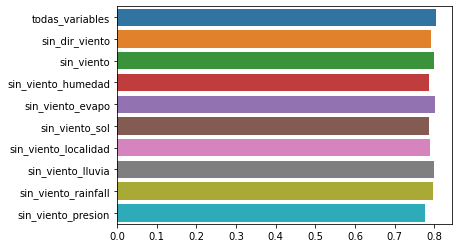

In [88]:
#luego de probar eliminar viarias variables se observa que

lista_var = ['todas_variables' , 'sin_dir_viento' , 'sin_viento' , 'sin_viento_humedad' , 'sin_viento_evapo',
'sin_viento_sol' , 'sin_viento_localidad' , 'sin_viento_lluvia' , 'sin_viento_rainfall' , 'sin_viento_presion']

lista_scores = [todas_variables , sin_dir_viento , sin_viento , sin_viento_humedad , sin_viento_evapo,
sin_viento_sol , sin_viento_localidad , sin_viento_lluvia , sin_viento_rainfall , sin_viento_presion]

import seaborn as sns

sns.barplot(lista_scores , lista_var)

In [111]:
#from sklearn.tree import export_graphviz
#export_graphviz(
#arbol_nonull,
#out_file=("arbol_nonull.dot"),
#feature_names=nonull_test.columns.ravel(),
#class_names=(y_nonull_test.iloc[0]).astype(str),#aca me hace ruido, y no lo puedo resolver
#rounded=True,
#filled=True
#)

/tmp/ipykernel_56358/3767242169.py:5: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  feature_names=nonull_test.columns.ravel(),


IndexError: index 1 is out of bounds for axis 0 with size 1

In [141]:
#ahora qeuda ustilizar random forest

'''from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)'''

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True)

rf.fit(nonull_train , np.asarray(y_nonull_train).ravel())

RandomForestClassifier(oob_score=True)

In [142]:
variables_rf = list(rf.feature_names_in_)

In [144]:
importancia_variables_rf = list(rf.feature_importances_)

In [125]:
rf.feature_importances_.min()

0.0018859808883479221

/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

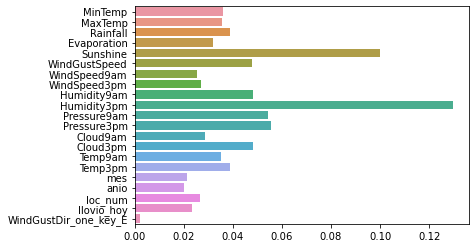

In [145]:
sns.barplot(importancia_variables_rf[:21] , variables_rf[:21])

In [ ]:
rf.

In [146]:
rf.oob_score_

0.8578296703296703

In [147]:
importancia_variables_rf[:20]

[0.03605425997832922,
 0.035439701729544394,
 0.03891491439292132,
 0.031962804927356855,
 0.09998752669747976,
 0.04762911279826115,
 0.0255537937701055,
 0.02719532973247168,
 0.04803264558673969,
 0.1298262387986038,
 0.054482364499284966,
 0.05555658201904043,
 0.028559073771000174,
 0.048114904111843146,
 0.035083183215799014,
 0.03875818774564755,
 0.021177105139708927,
 0.01997275422463935,
 0.02682698988204445,
 0.023381718181275372]

In [151]:
variables_rf[:20]

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'mes',
 'anio',
 'loc_num',
 'llovio_hoy']

In [ ]:
variables_rf[:20]

In [152]:
rf_var_relevantes = RandomForestClassifier(oob_score=True)

rf_var_relevantes.fit(nonull_train.loc[:,variables_rf[:20]] , np.asarray(y_nonull_train).ravel())

RandomForestClassifier(oob_score=True)

In [153]:
rf_var_relevantes.oob_score_

0.8592032967032966

In [154]:
rf_var_relevantes.feature_importances_

array([0.04239824, 0.04010713, 0.04479083, 0.03801375, 0.10561168,
       0.05666205, 0.0306524 , 0.03134477, 0.04982435, 0.15801677,
       0.06009576, 0.06833431, 0.02891199, 0.06388456, 0.04072675,
       0.04200963, 0.02529351, 0.0246497 , 0.03173098, 0.01694083])

In [155]:
rf_var_relevantes.feature_names_in_

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'mes', 'anio', 'loc_num',
       'llovio_hoy'], dtype=object)

/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

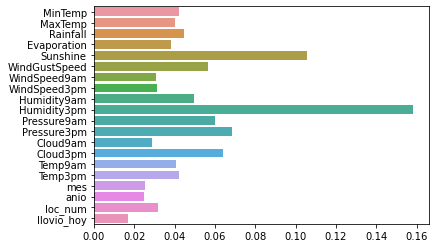

In [157]:
sns.barplot(rf_var_relevantes.feature_importances_ , rf_var_relevantes.feature_names_in_)

/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

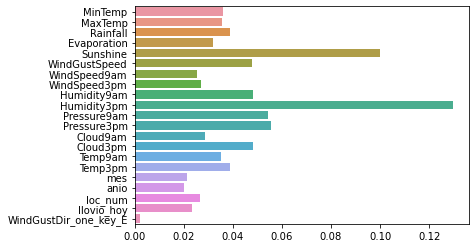

In [158]:
#otra vez con todas las variables, las 20 de mayor imiportancia, para comparar
sns.barplot(importancia_variables_rf[:21] , variables_rf[:21])

In [ ]:
#debajo de la cuarta rankeada, se modifican algunas de las iimportancias relativas de las variables

In [ ]:
########prueba de concepto#############

In [ ]:
#voy a escribir algo, para qeudarme ocn los 20 mayores


TypeError: 'enumerate' object is not callable

In [ ]:
rf_var_relevantes.feature_importances_[:20]

In [175]:
lista_var_relevantes = list(rf_var_relevantes.feature_importances_[:20])

In [ ]:
#lista.max() devuelve el max valor de la lista

#lista.index(valor) devuelve el indice de dicho valor dentro de la lista

#lista.remove() remueve un dado valor

#lista.del() remueve por indice

In [176]:
lista_variables = variables_rf[:20]

In [179]:
importancia = []
variable = []
for i in range(0 , len(lista_var_relevantes)):
    
    maxim = max(lista_var_relevantes)
    indice_max = lista_var_relevantes.index(maxim)
    la_variable = lista_variables[indice_max]
    
    importancia.append(maxim)
    
    variable.append(la_variable)
    
    del lista_var_relevantes[indice_max]
    
    del lista_variables[indice_max]
    
print(len(importancia) , len(variable))

20 20


In [180]:
importancia

[0.15801676535279538,
 0.10561168385570889,
 0.06833431069557848,
 0.06388456429364622,
 0.06009576255174578,
 0.056662053400864026,
 0.04982434676187415,
 0.044790828818987605,
 0.04239824175908297,
 0.04200963066789619,
 0.04072675211344433,
 0.04010713277679522,
 0.03801374885717526,
 0.031730977092997034,
 0.031344765758659444,
 0.030652403952907276,
 0.028911993767446936,
 0.0252935087086527,
 0.024649703684314767,
 0.016940825129427368]

In [181]:
variable

['Humidity3pm',
 'Sunshine',
 'Pressure3pm',
 'Cloud3pm',
 'Pressure9am',
 'WindGustSpeed',
 'Humidity9am',
 'Rainfall',
 'MinTemp',
 'Temp3pm',
 'Temp9am',
 'MaxTemp',
 'Evaporation',
 'loc_num',
 'WindSpeed3pm',
 'WindSpeed9am',
 'Cloud9am',
 'mes',
 'anio',
 'llovio_hoy']

In [186]:
importancia2 = []
variable2 = []
lista_var_relevantes2 = list(rf.feature_importances_)
lista_variables2 = list(rf.feature_names_in_)
for i in range(0 , len(lista_var_relevantes2)):
    
    maxim = max(lista_var_relevantes2)
    indice_max = lista_var_relevantes2.index(maxim)
    la_variable = lista_variables2[indice_max]
    
    importancia2.append(maxim)
    
    variable2.append(la_variable)
    
    del lista_var_relevantes2[indice_max]
    
    del lista_variables2[indice_max]
    
print(len(importancia2) , len(variable2))

68 68


/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

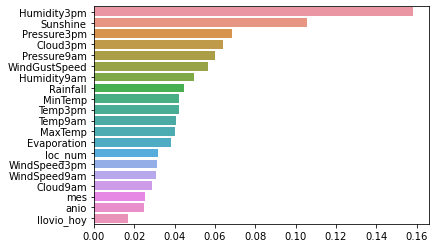

In [184]:
sns.barplot(importancia,variable)#con menso features

/home/mariano/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

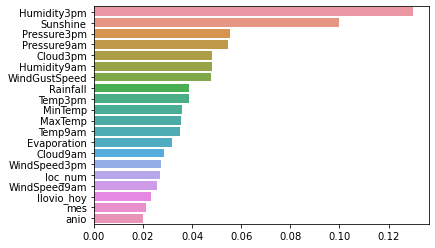

In [188]:
sns.barplot(importancia2[:20],variable2[:20])
#con mas features

